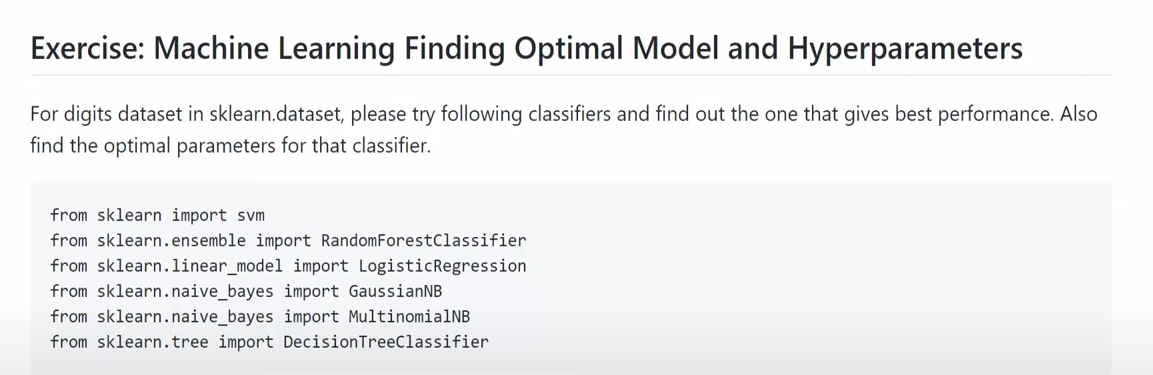

In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
digits = load_digits()

In [12]:
model_params = {
    'svm':{"model": SVC(gamma='auto'),'params':{"C":[1,10,20],"kernel":['rbf','linear']}},
    'random_forest':{'model':RandomForestClassifier(),'params':{"n_estimators":[1,5,10]}},
    'logistic_regression':{'model':LogisticRegression(solver='liblinear',multi_class='auto'),"params":{'C':[1,5,10]}},
    'GaussianNB':{'model':GaussianNB(),'params':{}},
    'MultinomialNB':{'model':MultinomialNB(),'params':{'alpha':[1,5,10]}},
    'DecisionTreeClassifier':{'model':DecisionTreeClassifier(),'params':{"criterion":['gini','entropy','log_loss',],'splitter':['best','random']}}
    
}

In [13]:
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(digits.data,digits.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Nabeel\AppData\Local\Programs\Pyth

In [14]:
scores

[{'model': 'svm',
  'best_score': 0.9476973073351903,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.9031894150417827,
  'best_params': {'n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.9221138966264315,
  'best_params': {'C': 1}},
 {'model': 'GaussianNB', 'best_score': 0.8069281956050759, 'best_params': {}},
 {'model': 'MultinomialNB',
  'best_score': 0.8742463633549985,
  'best_params': {'alpha': 10}},
 {'model': 'DecisionTreeClassifier',
  'best_score': 0.8058139894769422,
  'best_params': {'criterion': 'log_loss', 'splitter': 'best'}}]

In [16]:
import pandas as pd
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.903189,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,GaussianNB,0.806928,{}
4,MultinomialNB,0.874246,{'alpha': 10}
5,DecisionTreeClassifier,0.805814,"{'criterion': 'log_loss', 'splitter': 'best'}"
